
# Project: Investigate a Dataset


# Introduction
In this project I seek to identify the factors that are important in predicting whether or not a patient shows up for their scheduled appointments by utilizing various tools such as pandas, numpy and matplotlib.
I chose the 'noshowappointments' dataset that collects information from 100,000 medical appointments in Brazil. Some of the crucial questions that I seek to analyze include:
 *  If the gender affects patients showing up
 *  If age affects patients showing up
 *  If neighbourhood affects whether patients show up
 *  If scholarship affects patients that show up
 *  If chronic illnesses affect patients that show up

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

%matplotlib inline

# Data Wrangling

## General properties 

In [420]:
# performing basic operations to inspect the data
sample_data= pd.read_csv('noshowappointments.csv')
sample_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [421]:
#the number of patients(rows) and their characteristics(columns)
sample_data.shape

(110527, 14)

In [422]:
#inspect the data tyoes for instances of missing data
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing data

In [423]:
sample_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 * The mean age is 37 years
 * The maximum age is 115 years
 * The minimum age is -1 which could most likely be an error

# Data Cleaning

For analytical purposes, I won't be needing some of the attributes from the dataset as they will not be needed for inference purposes. These columns include patient ID, Appointment ID, scheduled ID, and appointment day. 

In [424]:
#dropping columns
sample_data.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'SMS_received'], axis = 1, inplace=True)
sample_data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


In [425]:
#correcting the 'hipertension' spelling
sample_data.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
sample_data.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


In [426]:
#Renaming the 'No-show' column to 'No_show' to facilitate analysis
sample_data.rename(columns={'No-show': 'No_show'}, inplace=True)
sample_data.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No



# Data Visualization

## A general look on the data


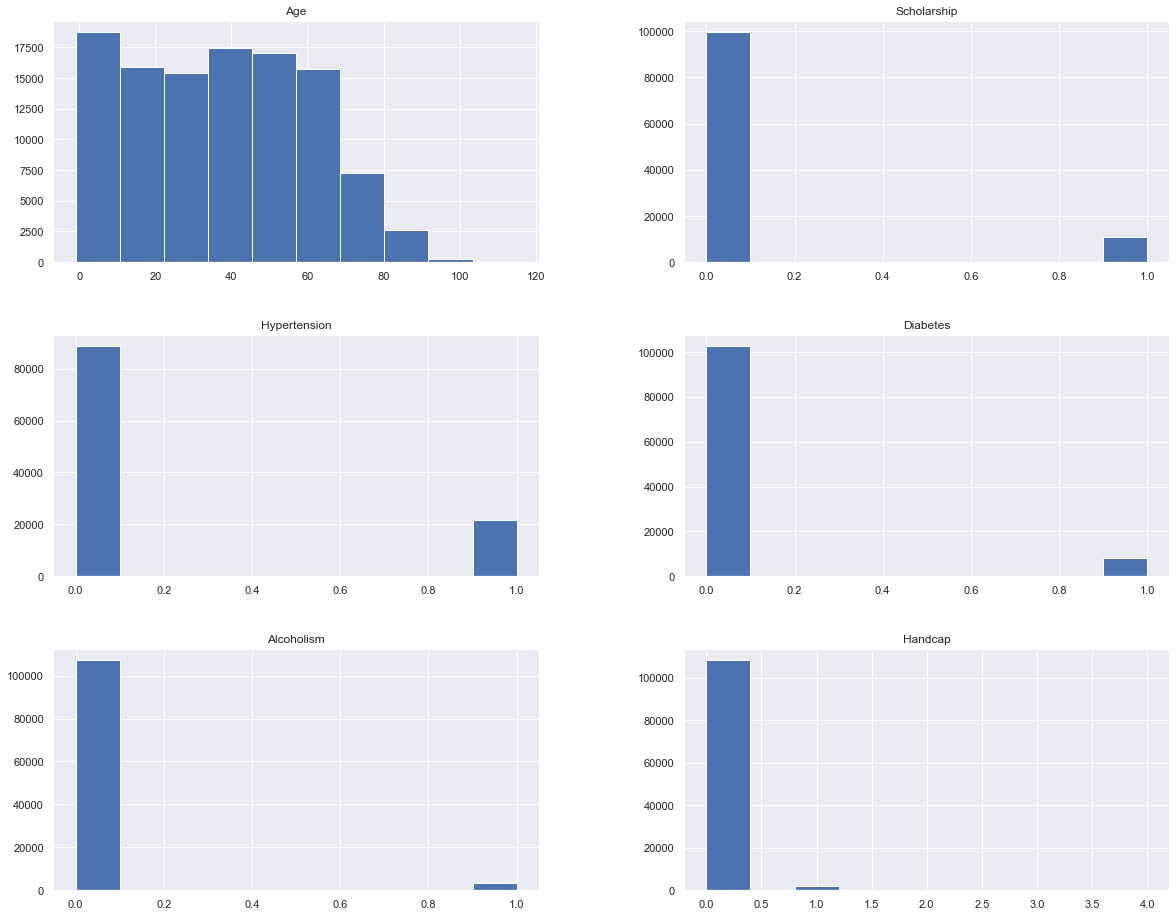

In [427]:
#drawing a histogram of the whole dataset(exploring the data)
sample_data.hist(figsize = (20,16));

In [428]:
#Getting the exact number of patients who showed up vs those who didn't
showed = sample_data.No_show == 'No'
noShow = sample_data.No_show == 'Yes'

In [429]:
sample_data[showed].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
No_show          88208
dtype: int64

In [430]:
sample_data[noShow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
No_show          22319
dtype: int64

<AxesSubplot:xlabel='No_show', ylabel='count'>

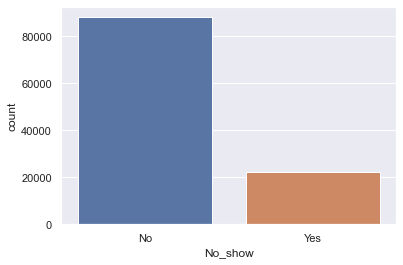

In [431]:
#visualizing those who showed for their appointment vs those who didn't
sns.countplot(x='No_show', data=sample_data)


The number of people who showed for their appointment was 88,208 while those who didn't was 22,319. Majority of people who had appointments showed up for their appointment.

## Analysing other characteristics


In [432]:
#creating a python function to assist in plotting
def label(x, y, t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

#### Analyzing if gender affects the patients showing up

<AxesSubplot:title={'center':'Comparing those who showed vs those who did not according to gender'}, xlabel='Gender', ylabel='Patients number'>

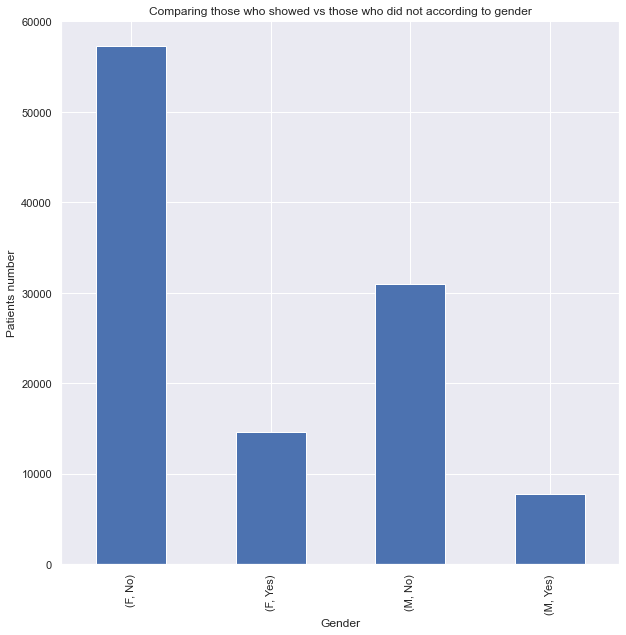

In [433]:
#comparing those who showed vs those who didn't according to gender
sample_data.groupby('Gender').No_show.value_counts().unstack()
df = sample_data.groupby('Gender').No_show.value_counts()
df.plot.bar(figsize=(10, 10), title ='Comparing those who showed vs those who did not according to gender', 
            xlabel= 'Gender', 
            ylabel= 'Patients number')

It can be observed that more females showed up for their appointment than their male counterparts in general(F-No Vs. M-No). Females were also more than males for those who didn't show up(F-Yes Vs. M-Yes). 
Females tended to be more in every aspect but this is in no way conclusive in detemining whether or not a patient shows up for their appointment.

#### Analyzing if scholarship affects patients showing up


<AxesSubplot:title={'center':'Comparing those who showed vs those who did not according to enrollment in the Brasilian program'}, xlabel='Scholarship', ylabel='Patients number'>

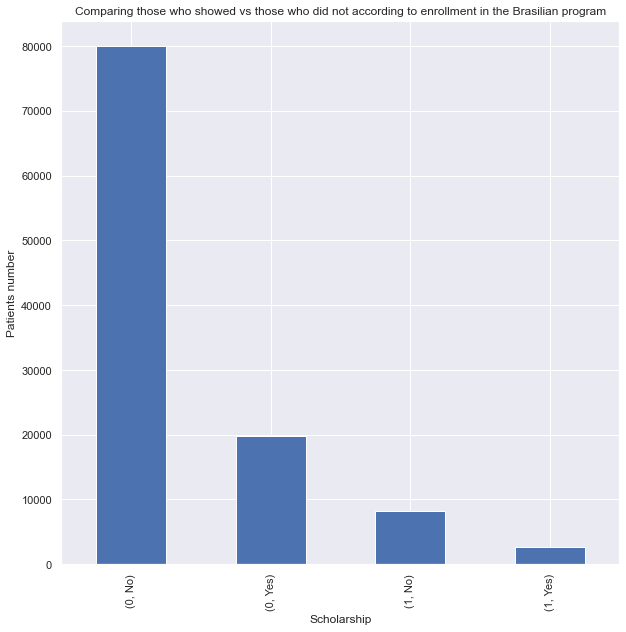

In [434]:
#comparing those who showed vs those who didn't according to enrollment in the Brasilian program
sample_data.groupby('Scholarship').No_show.value_counts().unstack()
df1 = sample_data.groupby('Scholarship').No_show.value_counts()
df1.plot.bar(figsize=(10, 10), title ='Comparing those who showed vs those who did not according to enrollment in the Brasilian program', 
            xlabel= 'Scholarship', 
            ylabel= 'Patients number')

It's difficult to tell a correlation between scholarship(1) and if it determines the likelihood of a patient showing up for their appointment.

#### Analyzing if neighbourhood affects patients showing up


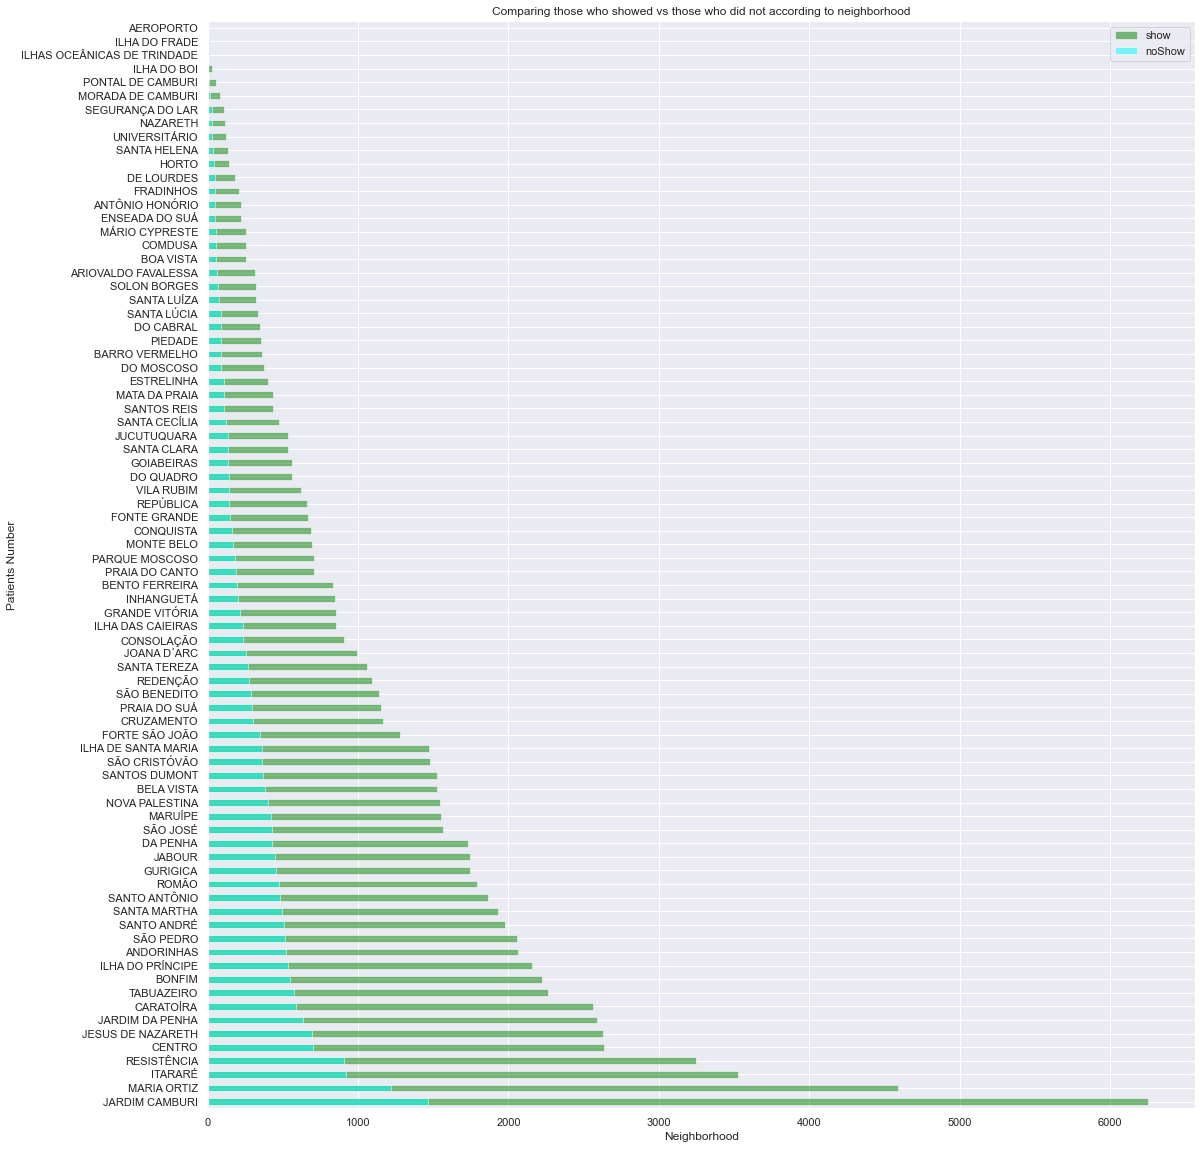

In [435]:
#comparing those who showed vs those who didn't according to neighborhood

plt.figure(figsize=[17.70, 20])
sample_data.Neighbourhood[showed].value_counts().plot (kind= 'barh', alpha = 0.5, color= 'green', label = 'show')
sample_data.Neighbourhood[noShow].value_counts().plot (kind= 'barh', alpha = 0.5, color= 'cyan', label = 'noShow')
plt.legend()
label('Neighborhood', 'Patients Number', 'Comparing those who showed vs those who did not according to neighborhood')

Certain neighbourhoods seem to be get more appointment than other neighbourhoods. It is difficult to show the correlation between patients that showed up versus those that didn't show up.

# Conclusions
There seems to be a correlation between neighbourhood and the number of patients who show up at the clinic. From my speculation, I would assume that more patients showed up because they live close to the vicinity of the hospital though there needs to be more evidence for it.

 
**Limitation** It was dificult to detect the correlation of patients that showed vs those who didn't when subject to many of the characteristics as a conclusive pattern could not be established.